In [20]:
import pandas as pd
import numpy as np

## Introduction to Pandas 🐼

What is pandas? Pandas is a Python library that is very useful for manipulating data. It is very commonly used in the Python community for any data analysis, including cleaning data, making quick visualizations, and preparing data for advanced analysis or machine learning algorithms. If you're interested in data science, you'll likely end up using Pandas quite a lot.

Fortunately, pandas is well integrated with other important data libraries like numpy (for vector and matrix operations), matplotlib (plotting and visualizations), and sckit-learn (machine learning). Pandas is incredibly well documented (http://pandas.pydata.org/pandas-docs/stable/)

### Data Structures: Series and DataFrames

The main data structures to be aware of in pandas are series and dataframes. Series are 1-dimensional arrays of data. Series can hold any type of data, but all elements in a specific series must be the same type. So you can have a series made up of integers, or a series made up of strings but you can't have a series of floats and strings-- you can create it, but the data types will be converted.

In [21]:
some_numbers = pd.Series([1, 2, 3])
some_strings = pd.Series(["cat", "dog", "mouse"])
mixed = pd.Series([1, "cat", 3.0])

In [22]:
print some_numbers
print some_strings
print mixed

0    1
1    2
2    3
dtype: int64
0      cat
1      dog
2    mouse
dtype: object
0      1
1    cat
2      3
dtype: object


In contrast, dataframes are 2-dimensional arrays of data where the columns can be different data types. A dataframe might look familiar, as its similar to how you might arrange data in a spreadsheet. 

In [15]:
df = pd.DataFrame({"animal":some_strings, "score":some_numbers*3})

In [23]:
df

,animal,score
0,cat,3
1,dog,6
2,mouse,9


There are a lot of different ways to construct a dataframe (from a Series, a dictionary, a numpy array, etc.) but I find most often you are probably reading data in from a csv or database. Fortunately, pandas has a lot of different methods of reading in data. For the rest of this tutorial, let's use some data available at [Kaggle](https://www.kaggle.com/c/titanic/data).

In [31]:
titanic = pd.read_csv("train.csv")

In [32]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
survived    891 non-null int64
pclass      891 non-null int64
name        891 non-null object
sex         891 non-null object
age         714 non-null float64
sibsp       891 non-null int64
parch       891 non-null int64
ticket      891 non-null object
fare        891 non-null float64
cabin       204 non-null object
embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 76.6+ KB


In [33]:
titanic.head()

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Let's say I just want to view 1 column of the dataframe. Notice anything about this output?

In [38]:
titanic["name"]

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
5                                       Moran, Mr. James
6                                McCarthy, Mr. Timothy J
7                         Palsson, Master. Gosta Leonard
8      Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                    Nasser, Mrs. Nicholas (Adele Achem)
10                       Sandstrom, Miss. Marguerite Rut
11                              Bonnell, Miss. Elizabeth
12                        Saundercock, Mr. William Henry
13                           Andersson, Mr. Anders Johan
14                  Vestrom, Miss. Hulda Amanda Adolfina
15                      Hewlett, Mrs. (Mary D Kingcome) 
16                                  Rice, Master. Eugene
17                          Wil

It's a series! The columns and the rows in DataFrames are both Series. This means anything you can do to a Series, you can do to a row or column in a dataframe and turns out to be pretty handy.

In [35]:
# Useful for numeric data
titanic.describe()

/Users/levi/projects/anaconda2/lib/python2.7/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,NaN,0.000000,0.000000,7.910400
50%,0.000000,3.000000,NaN,0.000000,0.000000,14.454200
75%,1.000000,3.000000,NaN,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [39]:
# Useful for categorical data
titanic["sex"].value_counts()

male      577
female    314
Name: sex, dtype: int64

What if I need to see only a specific slice of rows and columns? The most common way to achieve this is the .loc method:

In [41]:
# View only Name and survived for rows 10-20
titanic.loc[10:20,["name", "survived"]]

,name,survived
10,"Sandstrom, Miss. Marguerite Rut",1
11,"Bonnell, Miss. Elizabeth",1
12,"Saundercock, Mr. William Henry",0
13,"Andersson, Mr. Anders Johan",0
14,"Vestrom, Miss. Hulda Amanda Adolfina",0
15,"Hewlett, Mrs. (Mary D Kingcome)",1
16,"Rice, Master. Eugene",0
17,"Williams, Mr. Charles Eugene",1
18,"Vander Planke, Mrs. Julius (Emelia Maria Vande...",0
19,"Masselmani, Mrs. Fatima",1


In [42]:
# Also lets us easily filter; say I want to see the names of passengers under age 18
titanic.loc[titanic["age"] < 18, ["name", "age"]]

,name,age
7,"Palsson, Master. Gosta Leonard",2.00
9,"Nasser, Mrs. Nicholas (Adele Achem)",14.00
10,"Sandstrom, Miss. Marguerite Rut",4.00
14,"Vestrom, Miss. Hulda Amanda Adolfina",14.00
16,"Rice, Master. Eugene",2.00
22,"McGowan, Miss. Anna ""Annie""",15.00
24,"Palsson, Miss. Torborg Danira",8.00
39,"Nicola-Yarred, Miss. Jamila",14.00
43,"Laroche, Miss. Simonne Marie Anne Andree",3.00
50,"Panula, Master. Juha Niilo",7.00


In [43]:
# Same as above but only where Survived = 1:
titanic.loc[(titanic["age"] < 18) & (titanic["survived"] == 1), :]

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
9,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.00,1,0,237736,30.0708,NaN,C
10,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.00,1,1,PP 9549,16.7000,G6,S
22,1,3,"McGowan, Miss. Anna ""Annie""",female,15.00,0,0,330923,8.0292,NaN,Q
39,1,3,"Nicola-Yarred, Miss. Jamila",female,14.00,1,0,2651,11.2417,NaN,C
43,1,2,"Laroche, Miss. Simonne Marie Anne Andree",female,3.00,1,2,SC/Paris 2123,41.5792,NaN,C
58,1,2,"West, Miss. Constance Mirium",female,5.00,1,2,C.A. 34651,27.7500,NaN,S
68,1,3,"Andersson, Miss. Erna Alexandra",female,17.00,4,2,3101281,7.9250,NaN,S
78,1,2,"Caldwell, Master. Alden Gates",male,0.83,0,2,248738,29.0000,NaN,S
84,1,2,"Ilett, Miss. Bertha",female,17.00,0,0,SO/C 14885,10.5000,NaN,S
125,1,3,"Nicola-Yarred, Master. Elias",male,12.00,1,0,2651,11.2417,NaN,C


### Creating new columns
You'll often want to create new variables or features based on the data you have. In this dataset, passengers under 1 year have an age listed as a percent of a year. Let's create a new variable that is age in months.

In [44]:
titanic["age_mos"] = titanic["age"]*12
# to round to whole months:
#titanic["age_mos"] = titanic["Age"].apply(lambda x: round(x*12))
titanic.loc[titanic["age"]< 1, :]

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,age_mos
78,1,2,"Caldwell, Master. Alden Gates",male,0.83,0,2,248738,29.0000,NaN,S,9.96
305,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11.04
469,1,3,"Baclini, Miss. Helene Barbara",female,0.75,2,1,2666,19.2583,NaN,C,9.00
644,1,3,"Baclini, Miss. Eugenie",female,0.75,2,1,2666,19.2583,NaN,C,9.00
755,1,2,"Hamalainen, Master. Viljo",male,0.67,1,1,250649,14.5000,NaN,S,8.04
803,1,3,"Thomas, Master. Assad Alexander",male,0.42,0,1,2625,8.5167,NaN,C,5.04
831,1,2,"Richards, Master. George Sibley",male,0.83,1,1,29106,18.7500,NaN,S,9.96


Maybe I want to create a categorical variable for whether a passenger is an adult (over age 18). I can do this really simply with a boolean:

In [45]:
titanic["adult"] = titanic["age"] >= 18

In [46]:
titanic.head()
# if need to convert to int:
# titanic["adult"] = titanic["adult"]*1

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,age_mos,adult
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,264.0,True
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,456.0,True
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,312.0,True
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,420.0,True
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,420.0,True


One quick aside: lots of pandas methods transform the data and return it to you without altering the actual dataframe you're working on. This is mostly good and it makes it harder for you to accidentally mess up your data. It does make it easy for you to **think** you changed some data but really you didn't alter it in place. The solution is to either set your dataframe or dataframe column equal to whatever transformation you applied (see titanic["adult"] = titanic["adult"]*1 above) or sometimes the method you're using has an "inplace" parameter that you can set to true.

In [47]:
## Another example: recode male/female to numbers
titanic.loc[titanic['sex'] == 'male', 'sex'] = 1
titanic.loc[titanic['sex'] == 'female', 'sex'] = 0

In [48]:
titanic.head()

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,age_mos,adult
0,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S,264.0,True
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,456.0,True
2,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,312.0,True
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S,420.0,True
4,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S,420.0,True


### Plotting

In [52]:
import matplotlib.pyplot as plt
# if using a notebook:
%matplotlib inline 

Pandas is well integrated with matplotlib, the most commonly used Python plotting library. It's really handy when you want to visualize your data with a quick histogram or make a nice looking bar chart. Dataframes and series even have a built in histogram method!

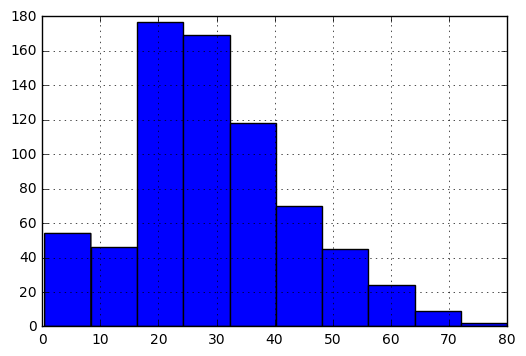

In [54]:
titanic["age"].hist() 

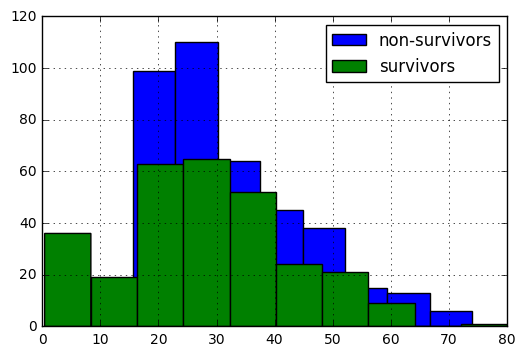

In [53]:
# let's compare age distribution among surviving passengers vs. those who didn't
titanic[titanic['survived'] == 0]['age'].hist(label="non-survivors")
titanic[titanic['survived'] == 1]['age'].hist(label="survivors")
plt.legend()
plt.show()

In [55]:
titanic.head()

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,age_mos,adult
0,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S,264.0,True
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,456.0,True
2,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,312.0,True
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S,420.0,True
4,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S,420.0,True


In [57]:
# Let's make a nice bar chart of sex breakdown of passengers in each class
pd.crosstab(titanic["sex"], titanic["pclass"])

pclass,1,2,3
sex,,,
0,94,76,144
1,122,108,347


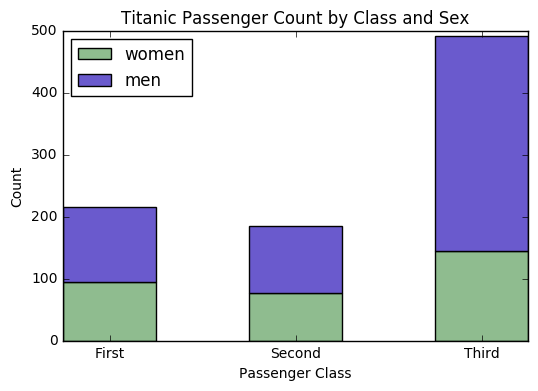

In [58]:
women, men = pd.crosstab(titanic["sex"], titanic["pclass"]).values
classes = np.arange(3)
width = 0.5
plt.bar(classes, women, width, color="DarkSeaGreen", label="women")
plt.bar(classes, men, width, bottom=women, color="SlateBlue", label="men")
plt.xticks(classes + width/2., ("First", "Second", "Third"))
plt.legend(loc="upper left")
plt.xlabel("Passenger Class")
plt.ylabel("Count")
plt.title("Titanic Passenger Count by Class and Sex")
plt.show()